# MLP SPAMHAM

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn as sns
import zipfile
import urllib.request

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
urllib.request.urlretrieve(url, "smsspamcollection.zip")

with zipfile.ZipFile("smsspamcollection.zip") as z:
    with z.open("SMSSpamCollection") as f:
        df = pd.read_csv(f, sep="\t", names=["label", "message"])

print(df.head())
print(df["label"].value_counts())

df["label"] = df["label"].map({"ham": 0, "spam": 1})
df["message_length"] = df["message"].apply(len)
print(df.head())

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df["message"])
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64
   label                                            message  message_length
0      0  Go until jurong point, crazy.. Available only ...             111
1      0                      Ok lar... Joking wif u oni...              29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3      0  U dun say so early hor... U c already then say...              49
4      0  Nah I don't think he goes to usf, he lives aro...              61


In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), 
                    activation='relu', 
                    solver='adam', 
                    max_iter=10, 
                    random_state=42,
                    verbose=True)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precisión: {precision * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Reporte de clasificación: \n{classification_report(y_test, y_pred, zero_division=0)}")


Iteration 1, loss = 0.63204243
Iteration 2, loss = 0.36986895
Iteration 3, loss = 0.16763909
Iteration 4, loss = 0.07410799
Iteration 5, loss = 0.03321273
Iteration 6, loss = 0.01797460
Iteration 7, loss = 0.01124683
Iteration 8, loss = 0.00781331
Iteration 9, loss = 0.00588038
Iteration 10, loss = 0.00466549
Accuracy: 97.85%
Precisión: 97.79%
F1-score: 95.10%
Recall: 92.80%
Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.86      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



c:\Users\anton\anaconda3\envs\supervised_unsupervised\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


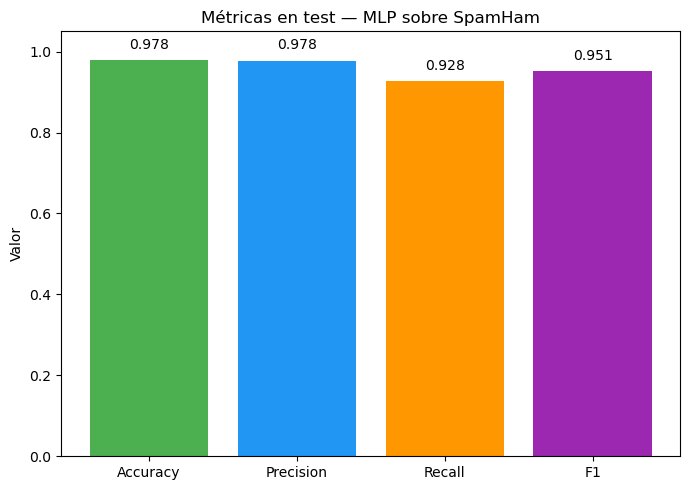

In [10]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals, color=["#4caf50", "#2196f3", "#ff9800", "#9c27b0"])
plt.ylim(0, 1.05)
plt.title("Métricas en test — MLP sobre SpamHam")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

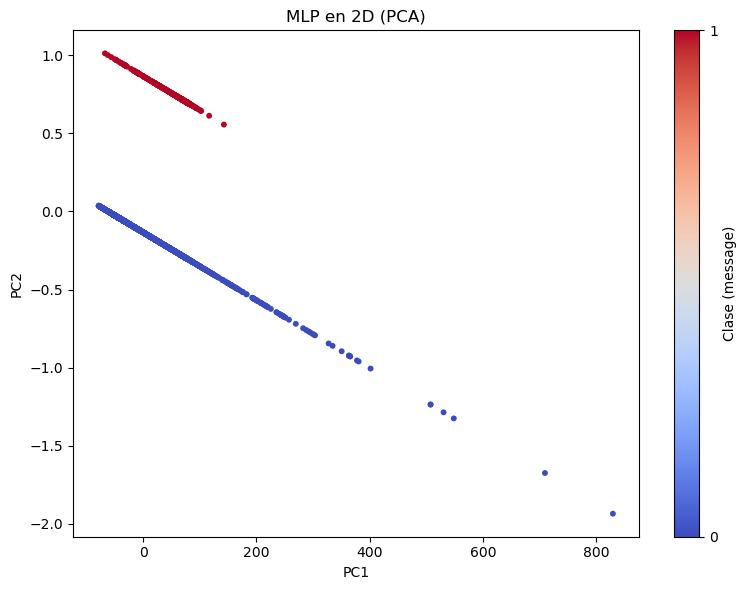

In [11]:
X_for_pca = df[["message_length", "label"]].values
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_for_pca)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", s=18, edgecolor="none")
plt.title("MLP en 2D (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(2))
cbar.set_label("Clase (message)")
plt.tight_layout()
plt.show()

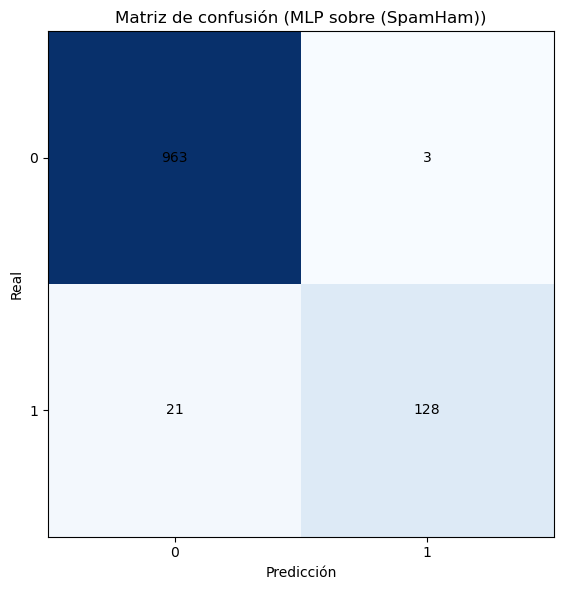

In [12]:
plt.figure(figsize=(7,6))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.title("Matriz de confusión (MLP sobre (SpamHam))")
plt.xticks(ticks=range(2), labels=range(2))
plt.yticks(ticks=range(2), labels=range(2))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Iteration 1, loss = 1.21885889
Validation score: 0.134529
Iteration 2, loss = 1.07908455
Validation score: 0.134529
Iteration 3, loss = 0.98038947
Validation score: 0.134529
Iteration 4, loss = 0.92035469
Validation score: 0.134529
Iteration 5, loss = 0.87376154
Validation score: 0.134529
Iteration 6, loss = 0.83947984
Validation score: 0.134529
Iteration 7, loss = 0.80210371
Validation score: 0.134529
Iteration 8, loss = 0.75975118
Validation score: 0.134529
Iteration 9, loss = 0.71359201
Validation score: 0.865471
Iteration 10, loss = 0.66470070
Validation score: 0.865471
Iteration 11, loss = 0.61558309
Validation score: 0.865471
Iteration 12, loss = 0.56775211
Validation score: 0.865471
Iteration 13, loss = 0.52420123
Validation score: 0.865471
Iteration 14, loss = 0.48671114
Validation score: 0.865471
Iteration 15, loss = 0.45661867
Validation score: 0.865471
Iteration 16, loss = 0.43365758
Validation score: 0.865471
Iteration 17, loss = 0.41757223
Validation score: 0.865471
Iterat

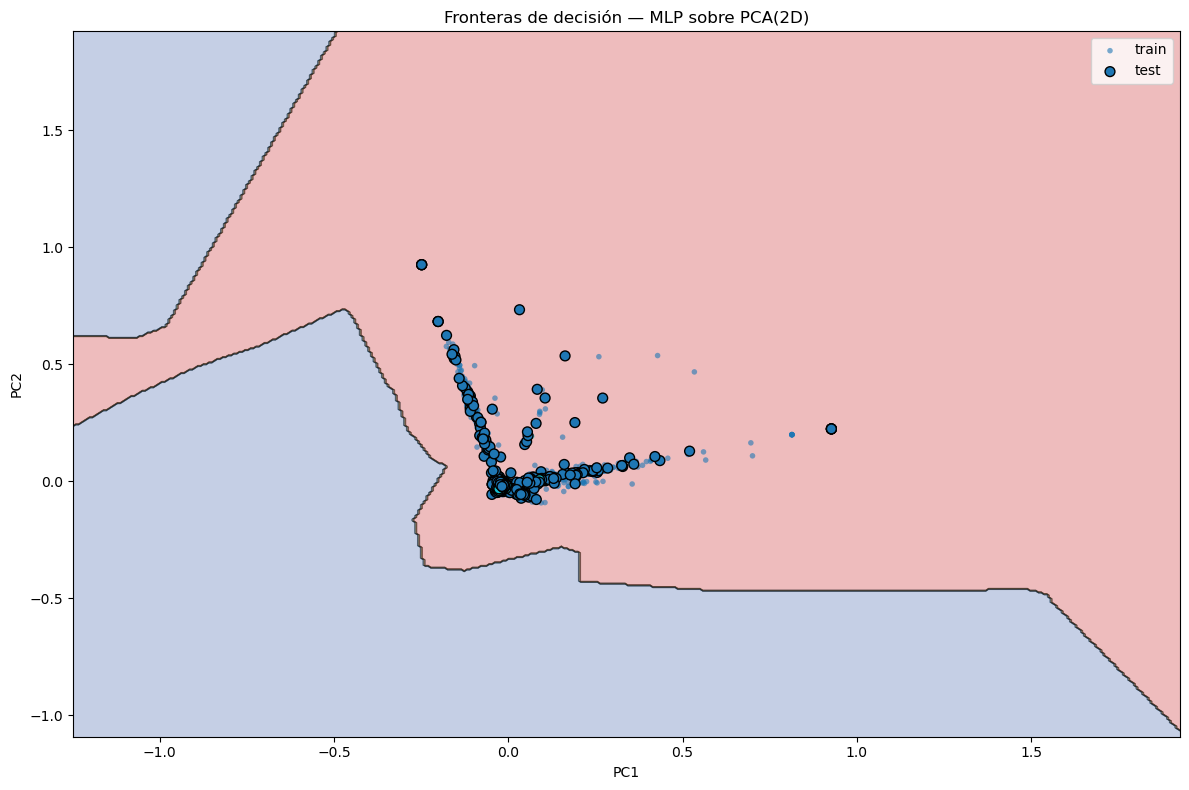

In [38]:
pca2 = PCA(n_components=2, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca  = pca2.transform(X_test)

mlp2 = MLPClassifier(
    hidden_layer_sizes=(20, 10), 
    max_iter=1000, 
    random_state=42,
    alpha=1e-4,
    verbose=True,
    validation_fraction=0.2,
    early_stopping=True,
    n_iter_no_change=20
)
mlp2.fit(X_train_pca, y_train)

# malla en el plano PCA
x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = mlp2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdYlBu")
plt.contour(xx, yy, Z, colors='black', alpha=0.4, linewidths=0.5)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10",
            s=16, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X_test_pca[:,0],  X_test_pca[:,1],  c=y_test,  cmap="tab10",
            s=50, edgecolor="k",   label="test")
plt.title("Fronteras de decisión — MLP sobre PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()